## Setup

In [ ]:
# Install required python packagesspike_recorder_soma
!pip install -r ../requirements.txt

## Imports

In [1]:
import sys
import os 
import warnings
import numpy as np

pkg_path = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
sys.path.append(pkg_path)

np.set_printoptions(threshold=np.inf, suppress=True, linewidth=np.inf)
warnings.filterwarnings(action='ignore', category=UserWarning)

import shtmbss2.addsrc
from shtmbss2.common.config import *
from shtmbss2.core.logging import log

Could not load module 'colorlog'. Continuing logging without colored formatter.


In [2]:
RuntimeConfig.backend = Backends.BRAIN_SCALES_2

In [3]:
shtm = None
if RuntimeConfig.backend == Backends.BRAIN_SCALES_2:
    import shtmbss2.brainscales2.patches
    from shtmbss2.brainscales2.hardware import hardware_initialization
    from shtmbss2.brainscales2.network import SHTMTotal
    # TODO: remove once grenade supports dense inter-population-view projections
    neuronPermutation = []
    shtm = SHTMTotal(use_on_chip_plasticity=True)
    alphabet_size = shtm.p.Network.num_symbols
    num_neurons_per_symbol = shtm.p.Network.num_neurons
    for a in range(alphabet_size):
        # dendrites
        for i in range(num_neurons_per_symbol):
            neuronPermutation.append((a * num_neurons_per_symbol + i) * 2)
    for a in range(alphabet_size):
        # somas
        for i in range(num_neurons_per_symbol):
            neuronPermutation.append((a * num_neurons_per_symbol + i) * 2 + 1)
    for i in range(alphabet_size * num_neurons_per_symbol * 2, 512):
        neuronPermutation.append(i)

    hardware_initialization(neuronPermutation=neuronPermutation)
elif RuntimeConfig.backend == Backends.NEST:
    from shtmbss2.nest.network import SHTMTotal
    
from shtmbss2.common.network import NeuronType, RecTypes

INFO  07:18:09,744  demo_helpers Using setup hxcube7fpga0chip57_1


## Configuration

In [4]:
# pynn.logger.default_config(level=pynn.logger.LogLevel.DEBUG)
# log.handlers[LogHandler.STREAM].setLevel(logging.DEBUG)

debug = False

experiment_num = None

## Network Initialization

In [5]:
if shtm is None:
    shtm = SHTMTotal()

# FIXME: the timer only starts at start_time + period, fake calculation
# to get exactly one execution at the end of each runtime
runtime=0.
shtm.init_plasticity_rule(start_time=19., period=20., runtime=runtime)
shtm.init_neurons()
shtm.init_connections(debug=debug)
shtm.init_external_input()

if RuntimeConfig.backend == Backends.BRAIN_SCALES_2:
    shtm.init_rec_exc()
    
shtm.experiment_num = experiment_num

Starting preprocessing/calibration...


In [6]:
#shtm = SHTMTotal.load_full_state(SHTMTotal, "test", 12)


## Network Emulation & Plotting

In [7]:
#import pynn_brainscales.brainscales2 as pynn
#pynn.logger.default_config(level=pynn.logger.LogLevel.DEBUG)
shtm.run(steps=4, plasticity_enabled=False)

Running emulation step 1/4
Computing performance for 2 Sequences.
Running emulation step 2/4
Computing performance for 2 Sequences.
Running emulation step 3/4
Computing performance for 2 Sequences.
Running emulation step 4/4
Computing performance for 2 Sequences.


In [ ]:
shtm.con_plastic[9].x[-1].reshape(15, 15)

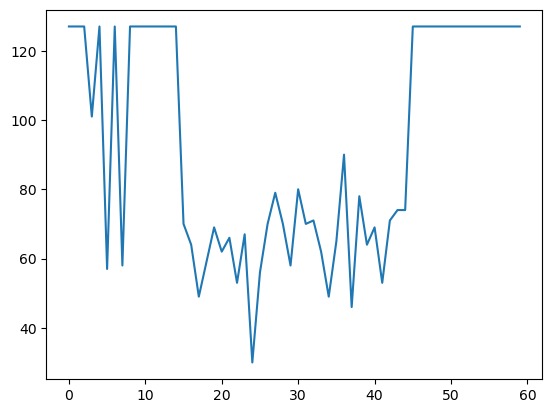

In [18]:
%matplotlib inline

import matplotlib.pyplot as plt

spikes = np.array(shtm.exc_to_exc_soma_to_soma_dummy[0].get_data("correlation")[-1].data)
spikes = spikes.reshape((60, 60))

# spike_sum = np.sum(spikes, axis=0)
spike_sum = np.max(spikes, axis=0)

plt.plot(spike_sum)

In [14]:
permanences = np.array(shtm.exc_to_exc_dendrite_to_soma_dummy[0].get_data("data")[-1].data).flatten()
permanences = permanences.reshape((60, 60))


In [ ]:
# prepare data
spikes = np.array(shtm.exc_to_exc_soma_to_soma_dummy[0].get_data("correlation")[-1].data)
permanences = np.array(shtm.exc_to_exc_dendrite_to_soma_dummy[0].get_data("data")[-1].data).flatten()

permanences = permanences.reshape((60, 60))
spikes = spikes.reshape((60, 60))

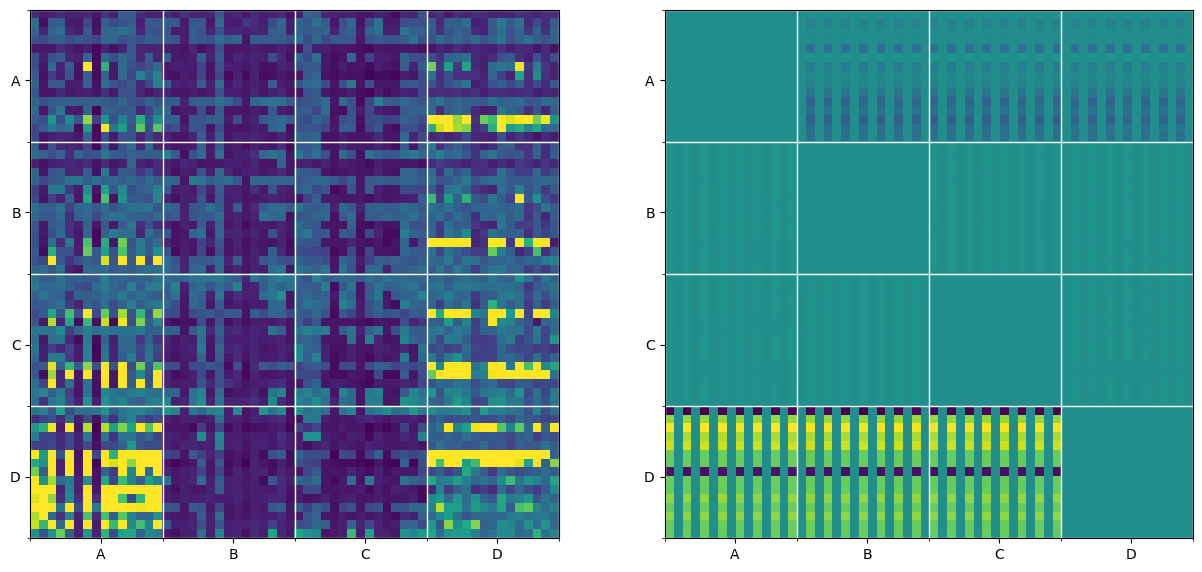

In [47]:
from matplotlib import pyplot as plt

# plot data
f, axarr = plt.subplots(1, 2, figsize=(15, 15))

for i, data_arr in enumerate([spikes, permanences]):

    axarr[i].imshow(data_arr, interpolation='nearest')

    # Major ticks
    axarr[i].set_xticks(np.arange(7.5, 60, 15))
    axarr[i].set_yticks(np.arange(7.5, 60, 15))

    axarr[i].set_xticklabels(['A', 'B', 'C', 'D'])
    axarr[i].set_yticklabels(['A', 'B', 'C', 'D'])

    # Minor ticks
    axarr[i].set_xticks(np.arange(-0.5, 60.5, 15), minor=True)
    axarr[i].set_yticks(np.arange(-0.5, 60.5, 15), minor=True)

    axarr[i].grid(which='minor', color='w', linestyle='-', linewidth=1)

# plt.show()


In [8]:
shtm.con_plastic[9].permanences[-1]

array([ 88,   0,  88,   0,  88,   0,  88,   0,  93,   0,  88,   0,  91,   0,  88, -30,   0, -30,   0, -30,   0, -30,   0, -31,   0, -30,   0, -30,   0, -30, -18,   0, -16,   0, -13,   0, -19,   0, -19,   0, -20,   0, -13,   0, -19, -59,   0, -59,   0, -59,   0, -59,   0, -59,   0, -59,   0, -59,   0, -59, -66,   0, -66,   0, -66,   0, -66,   0, -66,   0, -66,   0, -66,   0, -66, -76,   0, -78,   0, -76,   0, -78,   0, -77,   0, -78,   0, -78,   0, -77, -76,   0, -78,   0, -77,   0, -78,   0, -78,   0, -77,   0, -76,   0, -77,  66,   0,  67,   0,  66,   0,  67,   0,  65,   0,  66,   0,  67,   0,  66, -75,   0, -78,   0, -77,   0, -77,   0, -77,   0, -78,   0, -77,   0, -77, -75,   0, -76,   0, -77,   0, -77,   0, -77,   0, -78,   0, -76,   0, -77, -67,   0, -70,   0, -70,   0, -69,   0, -70,   0, -71,   0, -70,   0, -68, -75,   0, -78,   0, -76,   0, -77,   0, -77,   0, -78,   0, -76,   0, -76, -56,   0, -58,   0, -56,   0, -57,   0, -57,   0, -58,   0, -57,   0, -56, -77,   0, -77,   0

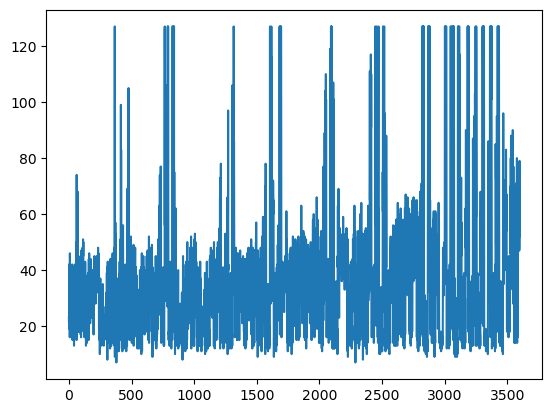

In [9]:
%matplotlib inline

import matplotlib.pyplot as plt

spikes = np.array(shtm.exc_to_exc_soma_to_soma_dummy[0].get_data("correlation")[-1].data)


plt.plot(spikes[:])

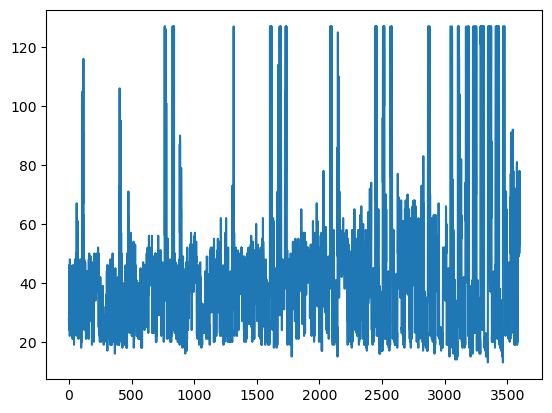

In [9]:
%matplotlib inline

import matplotlib.pyplot as plt

spikes = np.array(shtm.exc_to_exc_soma_to_soma_dummy[0].get_data("correlation")[-1].data)


plt.plot(spikes[:])

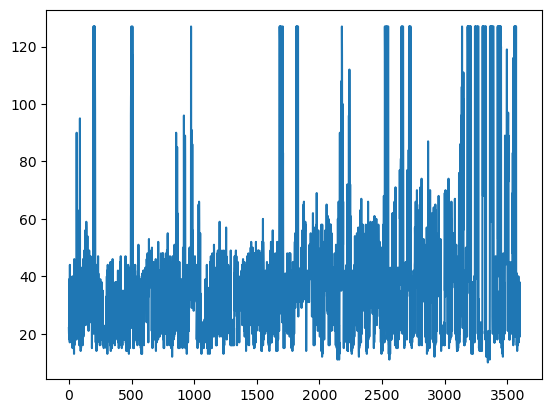

In [23]:
%matplotlib inline

import matplotlib.pyplot as plt

spikes = np.array(shtm.exc_to_exc_soma_to_soma_dummy[0].get_data("correlation")[-1].data)


plt.plot(spikes[:])


In [16]:
sums = list()
for i in range(len(shtm.con_plastic)):
    sums.append(np.sum(shtm.con_plastic[i].x))
print(sums)

[33884, 26003, 27598, 32883, 27595, 28968, 39080, 43204, 32627, 55597, 63467, 26500]


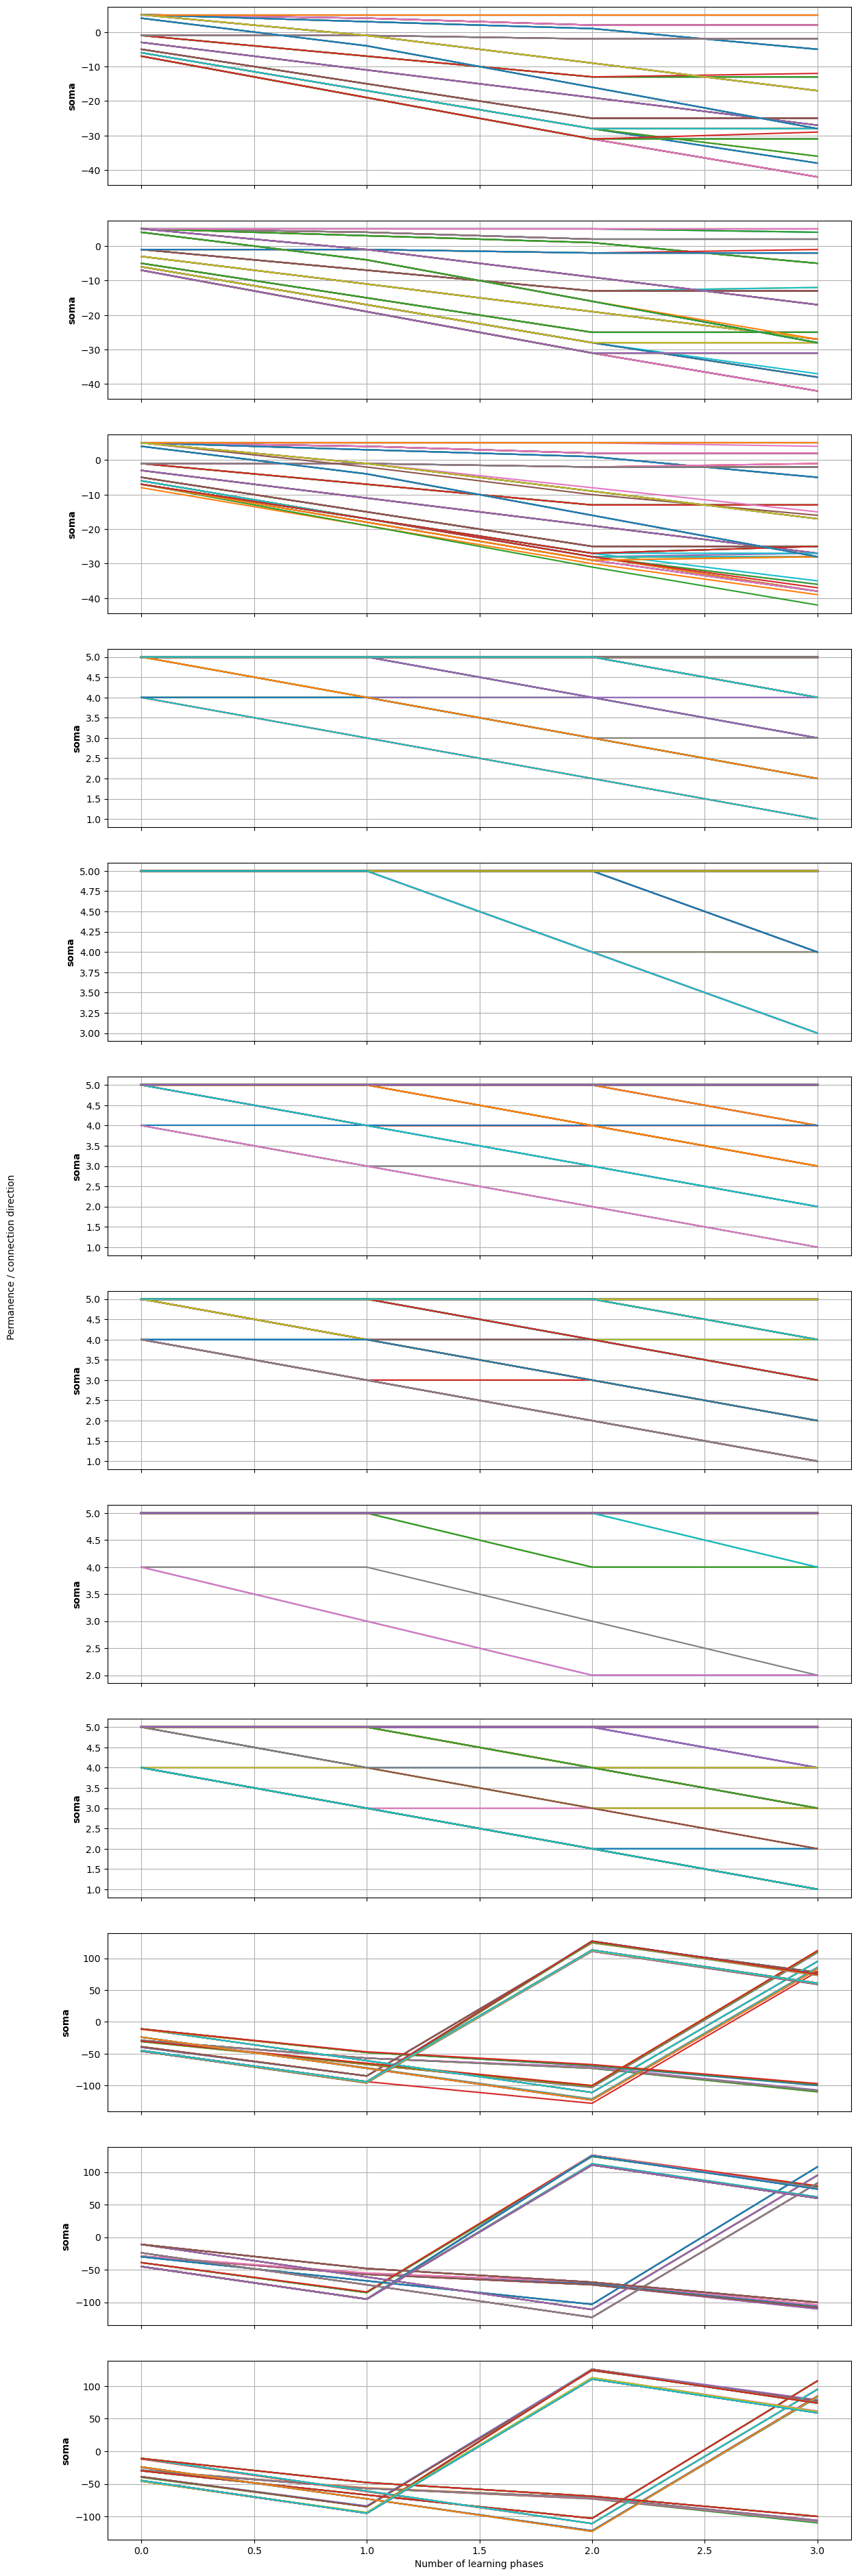

In [10]:
%matplotlib inline

shtm.plot_permanence_history(plot_con_ids="all")

Minor ticks not set because the number of ticks would be too high.


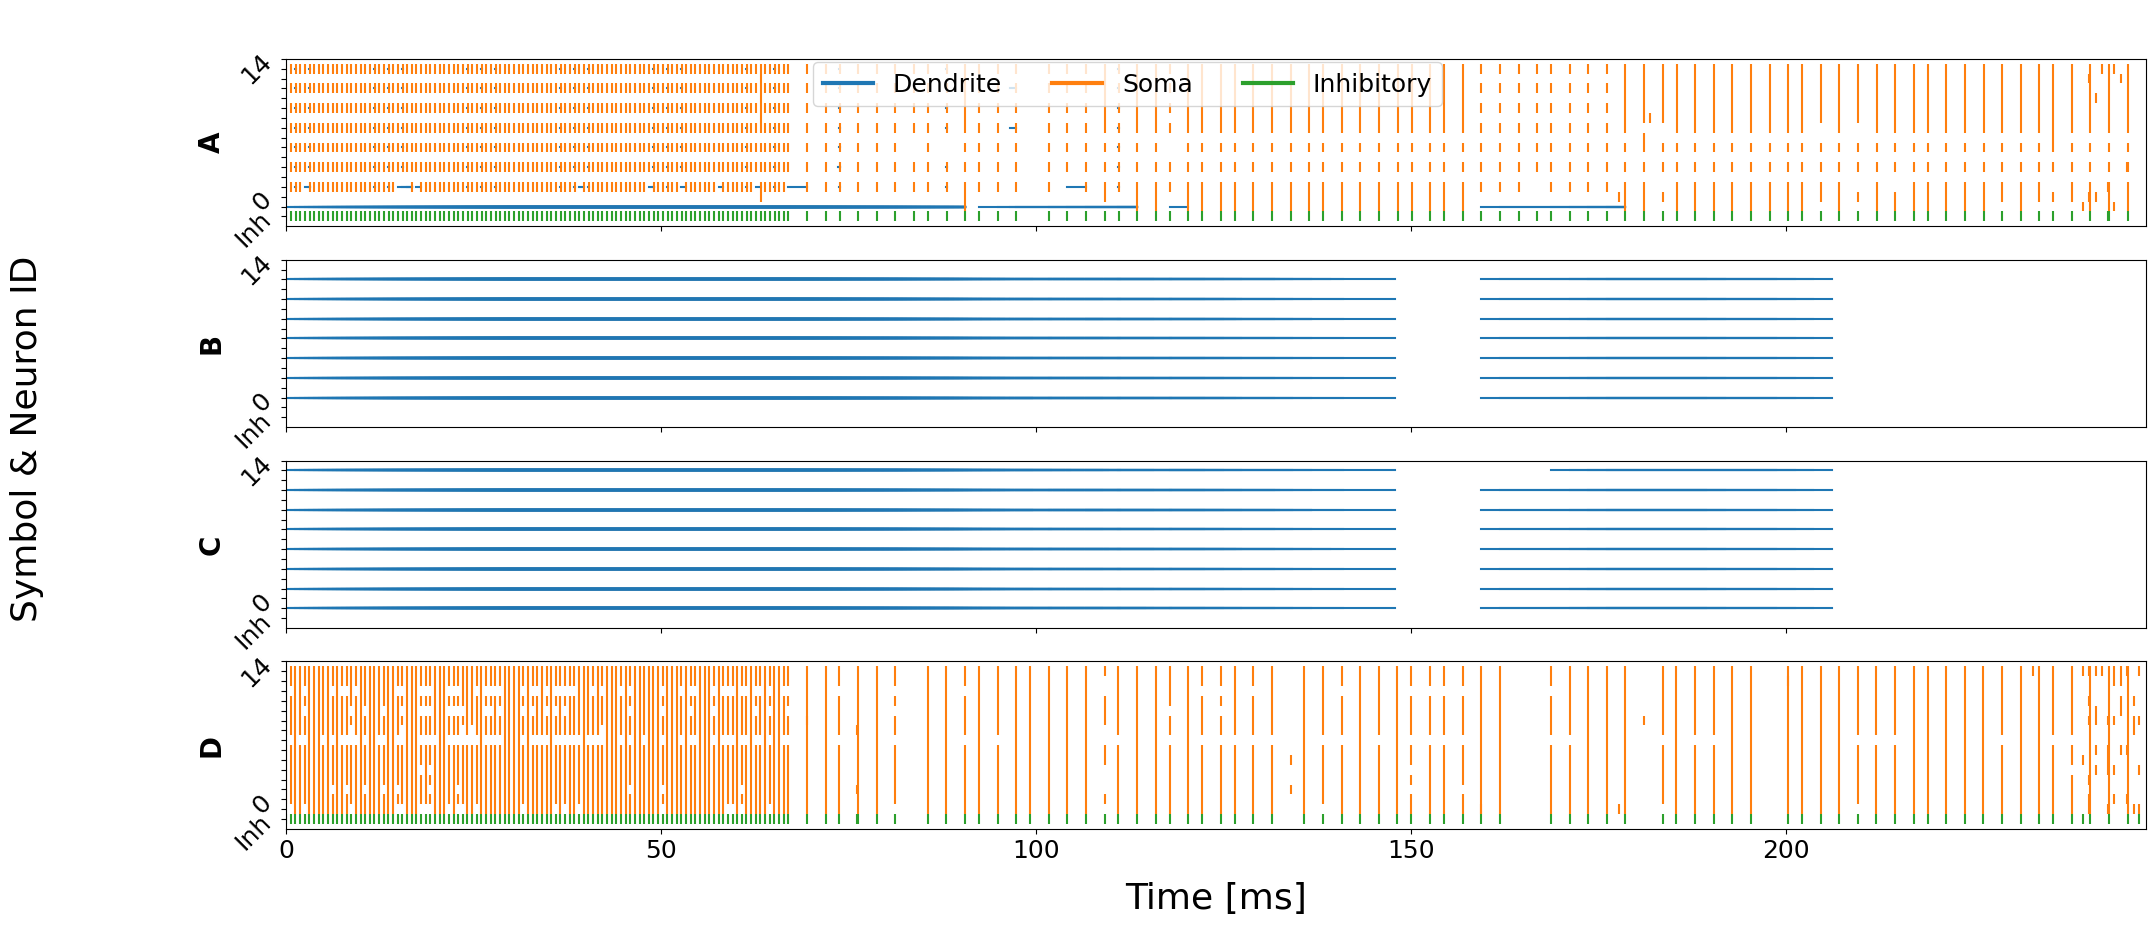

In [9]:
%matplotlib inline
# somehow takes way too long
shtm.plot_events(neuron_types="all", size=(24, 10))

In [ ]:
%matplotlib inline
from matplotlib import pyplot as plt

#print(shtm.con_plastic[0].permanences)
data = np.array(shtm.con_plastic[0].x[-1]).reshape((60,60))
print(data.shape)
plt.imshow(data)
plt.colorbar()

In [ ]:
%matplotlib inline
from matplotlib import pyplot as plt

#print(shtm.con_plastic[0].permanences)
data = np.array(shtm.con_plastic[0].z[-1]).reshape((60,60))
print(data.shape)
plt.imshow(data)
plt.colorbar()

In [ ]:
%matplotlib inline
from matplotlib import pyplot as plt

#print(shtm.con_plastic[0].permanences)
data = np.array(shtm.con_plastic[0].permanences[-1]).reshape((60,60))
print(data.shape)
plt.imshow(data)
plt.colorbar()

In [ ]:
%matplotlib inline
from matplotlib import pyplot as plt

#print(shtm.con_plastic[0].permanences)
data = np.array(shtm.con_plastic[0].weights[-1]).reshape((60,60))
print(data.shape)
plt.imshow(data)
plt.colorbar()

In [ ]:
%matplotlib inline
from matplotlib import pyplot as plt

#print(shtm.con_plastic[0].permanences)
data = np.array(shtm.con_plastic[0].rates[0]).reshape((60,60))
print(data.shape)
plt.imshow(data)
plt.colorbar()

In [ ]:
# print(np.array(shtm.con_plastic[0].rates[0]).reshape((60,60)))

In [ ]:
# print(shtm.neurons_ext.get("spike_times"))

In [ ]:
%matplotlib inline

shtm.plot_performance(StatisticalMetrics.MEAN)

In [ ]:
shtm.save_full_state()

## Second run

In [ ]:
shtm.run(steps=10, plasticity_enabled=True)

In [ ]:
%matplotlib inline

shtm.plot_events(neuron_types="all", size=(24, 10))

In [ ]:
%matplotlib inline

shtm.plot_performance()

In [ ]:
shtm.run(steps=10, plasticity_enabled=True)

In [ ]:
%matplotlib inline

shtm.plot_events(neuron_types="all", size=(24, 10))

In [ ]:
shtm.set_weights_exc_exc(10, 1, post_ids=[3,4,5], p_con=1.0)
shtm.run(steps=1, plasticity_enabled=True)

# %matplotlib inline
# shtm.plot_events(neuron_types="all", size=(24, 10))

## Additional Plotting

In [ ]:
%matplotlib inline

shtm.plot_permanence_diff()

In [ ]:
from copy import deepcopy
con_plastic_permanences = list()
for i in range(len(shtm.con_plastic)):
    con_plastic_permanences.append(deepcopy(shtm.con_plastic[i].permanences))

In [15]:
for i in range(len(shtm.con_plastic)):
    for k in range(len(shtm.con_plastic[i].permanences)):
        shtm.con_plastic[i].permanences[k] = shtm.con_plastic[i].permanences[k][:60]

In [14]:
perm = shtm.exc_to_exc_dendrite_to_soma_dummy[0].get_data("data")[-1].data

perm = np.array(perm).reshape((60, 60))

perm_a = perm[0:15, 15:30].flatten()
perm_b = perm[15:30, 30:45].flatten()

np.array_equal(perm_a, perm_b)

print(perm_a)
print(perm_b)



[ 127  127  127  127  127  127  127  127  127  127  127  127  127  127  127  107  107  107  107  107   83  107   14   -7  107   75   81  107  107   93    1  -99 -109  -88    6   -9   -6  -94 -124  -58  -65  -16  107   61 -111  127  127  127  127  127  127  127  127  127  127  127  127  127  127  127  127  127  127  127  127  127  127  127  127  127  127  127  127  127  127   63   63   63   63   63   63   63   63   63   63   63   63   63   63   63    5   75   83   50   47   27  101    6    2   59   37   61   77   76   75   59   71   76   73   84   59   84   48   58   75   63   84   84   74   69   70  113   57   58   89   78  113   50   52  113   72  105  113  113  113  127  127  127  127  127  127  127  127  127  127  127  127  127  127  127  127  127  127  127  127  127  127  127  127  127  127  127  127  127  127  127  127  127  127  127  127  127  127  127  127  127  127  127  127  127  127  127  127  127  127  127  127  127  127  127  127  127  127  127  127  127  127  127  127  127

In [9]:
np.array(shtm.exc_to_exc_dendrite_to_soma_dummy[0].get_data("data")[-1].data).reshape((60, 60))

array([[  0,   2,   4,   6,   8,  10,  12,  14,  16,  18,  20,  22,  24,  26,  28,  30,  32,  34,  36,  38,  40,  42,  44,  46,  48,  50,  52,  54,  56,  58,  60,  62,  64,  66,  68,  70,  72,  74,  76,  78,  80,  82,  84,  86,  88,  90,  92,  94,  96,  98, 100, 102, 104, 106, 108, 110, 112, 114, 116, 118],
       [  0,   2,   4,   6,   8,  10,  12,  14,  16,  18,  20,  22,  24,  26,  28,  30,  32,  34,  36,  38,  40,  42,  44,  46,  48,  50,  52,  54,  56,  58,  60,  62,  64,  66,  68,  70,  72,  74,  76,  78,  80,  82,  84,  86,  88,  90,  92,  94,  96,  98, 100, 102, 104, 106, 108, 110, 112, 114, 116, 118],
       [  0,   2,   4,   6,   8,  10,  12,  14,  16,  18,  20,  22,  24,  26,  28,  30,  32,  34,  36,  38,  40,  42,  44,  46,  48,  50,  52,  54,  56,  58,  60,  62,  64,  66,  68,  70,  72,  74,  76,  78,  80,  82,  84,  86,  88,  90,  92,  94,  96,  98, 100, 102, 104, 106, 108, 110, 112, 114, 116, 118],
       [  0,   2,   4,   6,   8,  10,  12,  14,  16,  18,  20,  22,  24, 

In [10]:
len(shtm.con_plastic[1].permanences[-1])

225

In [8]:
np.array_equal(np.array(shtm.con_plastic[3].permanences[-1]), np.array(shtm.con_plastic[0].permanences[-1]))

False

In [11]:
shtm.con_plastic[1].permanence

array([  0,   0,  36,  38,  28,  23,  25,  22,  24,  25,  24,  21,  26,  27,  25,   0,   0, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107, 107,   0,   0,  72,  72,  72,  72,  72,  72,  72,  72,  72,  72,  72,  72,  72,   0,   0,  50,  50,  50,  50,  50,  50,  50,  50,  50,  50,  50,  50,  50,   0,   0, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127,   0,   0,  63,  43,  43,  63,  63,  63,  63,  60,  44,  63,  48,  63,  42,   0,   0, 120, 121,  99, 111, 121, 121,  85, 110, 121, 101, 116, 116, 121,   0,   0,  92,  71,  71,  74,  74,  76,  79,  70,  68,  71,  73,  96,  84,   0,   0, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127,   0,   0, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127,   0,   0, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127,   0,   0, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127,   0,   0, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127, 127,   0,   0, 127, 127

In [14]:
shtm.con_plastic[1].permanence = 4

In [10]:
shtm.exc_to_exc[0].get("weight", format="array")

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
    

WARN  06:04:01,036  lib-rcf.OnDemandUpload.loop_upload Error while uploading: Remote call timeout exceeded. No response from peer.


In [11]:
num_neurons_total = shtm.p.Network.num_neurons * shtm.p.Network.num_symbols
num_neurons = shtm.p.Network.num_neurons

# save permanences
permanences = np.array(shtm.exc_to_exc_dendrite_to_soma_dummy[0].get_data("data")[-1].data).flatten()
permanences = permanences.reshape((num_neurons_total, num_neurons_total))

i_plastic = 0
permanence_list = list()
for i in range(shtm.p.Network.num_symbols):
    for k in range(shtm.p.Network.num_symbols):
        if i == k:
            continue

        i_neuron = i * num_neurons
        k_neuron = k * num_neurons

        permanences_tmp = permanences[i_neuron:i_neuron+num_neurons, k_neuron:k_neuron+num_neurons].flatten().copy()
        permanence_list.append(permanences_tmp)
        
        if i_plastic > 0:
            print(np.array_equal(permanence_list[-1], permanence_list[-2]))

        i_plastic += 1

False
False
False
False
False
False
True
True
False
False
False


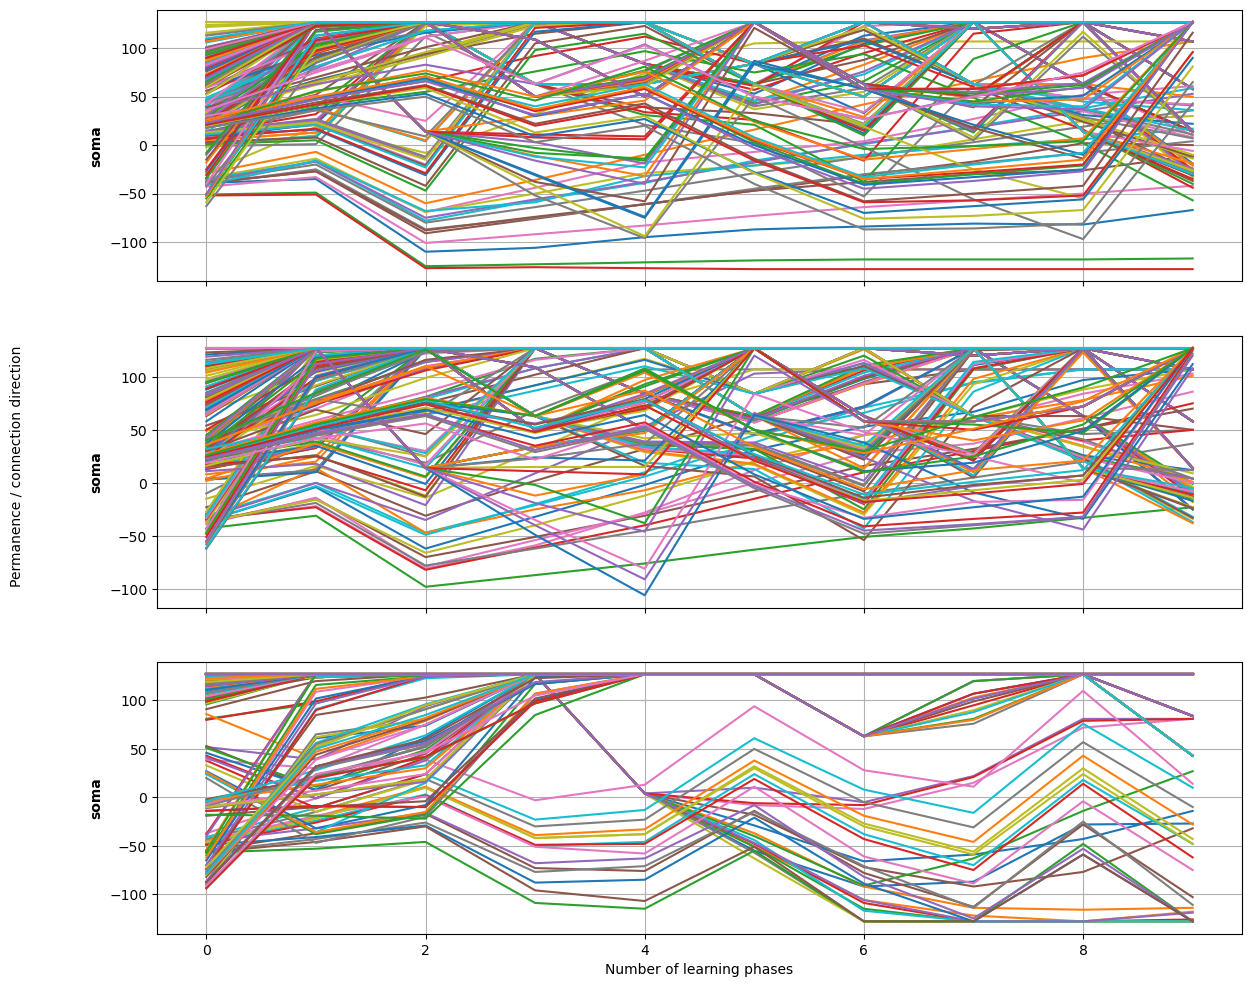

In [9]:
%matplotlib inline

# for i in [0, 1]:
#     print(shtm.con_plastic[i].permanences)

shtm.plot_permanence_history(plot_con_ids=[0, 1, 7])

In [ ]:
%matplotlib inline
from shtmbss2.common.network import NeuronType, RecTypes

shtm.plot_v_exc(alphabet_range=[2], neuron_range="all", neuron_type=NeuronType.Soma)

In [ ]:
%matplotlib inline

shtm.plot_v_exc(alphabet_range=[0], neuron_range='all', neuron_type=1, runtime=runtime, show_legend=False)

In [ ]:
%matplotlib inline

shtm.plot_v_exc(alphabet_range=range(1, alphabet_size))

## Additional Analysis

In [ ]:
for i in range(len(shtm.con_plastic)):
    shtm.con_plastic[i].mature_weight = 120
    print(i, shtm.con_plastic[i].projection.label.split('_')[1], shtm.con_plastic[i].get_all_connection_ids())
    

In [ ]:
arr = np.array(shtm.con_plastic[1].permanences)

In [ ]:
for c in shtm.con_plastic[1].projection.connections:
    print(f'C[{c.presynaptic_index}, {c.postsynaptic_index}].weight = {c.weight}')

In [ ]:
np.set_printoptions(threshold=np.inf, suppress=True, linewidth=np.inf)
shtm.con_plastic[1].projection.get("weight", format="array")

In [ ]:
shtm.con_plastic[7].projection.get("weight", format="array")

In [ ]:
# Print spikes form spiketrain
for s in shtm.con_plastic[1].projection.post.get_data("spikes").segments[-1].spiketrains:
    print(s)
print(len(shtm.con_plastic[1].projection.post.get_data("spikes").segments[-1].spiketrains))
print(len(shtm.con_plastic[1].projection.connections))

In [ ]:
for con in shtm.con_plastic:
    print(f"Sum(P[{con.projection.label}]) = {np.sum(con.permanences[-1] - con.permanences[0])}")

In [ ]:
dendrites, somas = shtm.get_spike_times(0.44, 0.1e-2)

print(somas)

In [ ]:
for i_plastic in range(len(shtm.con_plastic)):
    shtm.con_plastic[i_plastic].lambda_plus *= 2
    shtm.con_plastic[i_plastic].lambda_minus *= 2
    shtm.con_plastic[i_plastic].lambda_h *= 2
    
    # print(f"Sum(P[{con.projection.label}]) = {np.sum(con.permanences[-1] - con.permanences[0])}")

## Check indices

In [ ]:
dendrites, somas = shtm.neurons_exc[0]

print(somas.all_cells)
print(somas.id_to_index(13))

print(somas.get_data("spikes").segments[-1].spiketrains[8])
print(shtm.con_plastic[0].projection.pre.get_data("spikes").segments[-1].spiketrains[8])

## Check spikes

In [ ]:
dendrites, somas = shtm.neurons_exc[0]

spike_ids_a = list()
spike_ids_b = list()

# Print spikes form spiketrain
for s in somas.get_data("spikes").segments[-1].spiketrains:
    print(s)
    if len(s) > 0:
        print(s[0]/0.1e-3)
        spike_ids_a.append(int(s[0]/0.1e3))

    # for t in np.linspace(0., runtime, int(runtime / 0.1e-3)):
        
    
print(len(somas.get_data("spikes").segments[-1].spiketrains))



In [ ]:
print(shtm.neurons_exc[0][0].get("tau_m"))
print(shtm.neurons_inh[0].tau_m)
w = shtm.exc_to_inh[1].get("weight", format="array")
print(w)
print(pynn.get_current_time())

## Save objects

In [ ]:
import pickle

experiment_name = "shtm_off-chip_01"

with open(f'../evaluation/objects/{experiment_name}.pkl', 'wb') as out_file:
    pickle.dump(shtm, out_file)

In [ ]:
with open(f'../evaluation/objects/{experiment_name}.pkl', 'rb') as in_file:
    obj = pickle.load(in_file)

## Plotting - Events - All Symbols

In [ ]:
%matplotlib inline

seq = 2

fig_title = "Neuronal Events for Sequence {D, C, B} - After Learning"

file_path = f"../evaluation/figures/shtm-bss2_eval_learning-off-chip_seq-0{seq}_before-learning"
# file_path = f"../evaluation/figures/shtm-bss2_eval_learning-off-chip_seq-0{seq}_after-learning"

# file_path += "_a"

if seq == 1:
    fig = shtm.plot_events(shtm, size=[12, 10], x_lim_lower=0, x_lim_upper=0.14, seq_start=0.0, seq_end=0.14, fig_title=fig_title, file_path=file_path)
elif seq == 2:
    fig = shtm.plot_events(shtm, size=[12, 10], x_lim_lower=0.22, x_lim_upper=0.36, seq_start=0.22, seq_end=0.36, fig_title=fig_title, file_path=file_path)
    


## Plotting - Events - One Symbol

In [ ]:
%matplotlib inline

fig_title = "Neuronal Events for Sequence {D, C, B} - After Learning"
file_path = f"../evaluation/figures/shtm-bss2_eval_limits-spikes_w-inh"

# file_path += "_a"

fig = shtm.plot_events(shtm, neuron_types="all", symbols=[2], size=[12, 10], x_lim_lower=0, x_lim_upper=0.14, seq_start=0.0, seq_end=0.14, fig_title=fig_title, file_path=file_path)


spikes = shtm.neurons_exc[2][1].get_data("spikes").segments[-1].spiketrains

In [ ]:
# file_path_open = f"../evaluation/figures/shtm-bss2_eval_limits-volts_w-inh"
# file_path_open = f"../evaluation/figures/shtm-bss2_eval_limits-volts_wo-inh"
# file_path_open = f"../evaluation/figures/shtm-bss2_eval_limits-spikes_w-inh"
file_path_open = f"../evaluation/figures/shtm-bss2_eval_limits-spikes_wo-inh"

figx = pickle.load(open(f'{file_path_open}.fig.pickle', 'rb'))
figx.set_size_inches(12, 6)

figx.legends = []
figx.suptitle("")
figx.subplots_adjust(top=0.85)
neuron_types = [NeuronType.Dendrite, NeuronType.Soma, NeuronType.Inhibitory]
custom_lines = [Line2D([0], [0], color=f"C{n.ID}", label=n.NAME.capitalize(), lw=3) for n in neuron_types]
plt.figlegend(handles=custom_lines, loc=(0.402, 0.888), ncol=3, labelspacing=0., fontsize=18, fancybox=True, borderaxespad=1)


# figx.show()

figx.savefig(f"{file_path_open}.pdf", bbox_inches='tight')
# figx.savefig(f"{file_path_open}.png")

## Final Plots - Voltage

In [ ]:
%matplotlib inline

# plt.rcParams.update({'font.size': 12})

seq = 2

# file_path = f"../evaluation/figures/shtm-bss2_eval_learning-off-chip_seq-0{seq}_before-learning"
# file_path = f"../evaluation/figures/shtm-bss2_eval_learning-off-chip_seq-0{seq}_after-learning"
file_path = f"../evaluation/figures/shtm-bss2_eval_limits-volts_w-inh"

# file_path += "_a"

# if seq == 1:
    # fig = plot_v_exc(shtm, [0], neuron_range="all", size=[12, 10], x_lim_lower=0, x_lim_upper=0.14, seq_start=0.0, seq_end=0.14, file_path=file_path)
# elif seq == 2:
    # fig = plot_v_exc(shtm, [0], neuron_range="all", size=[12, 10], x_lim_lower=0.22, x_lim_upper=0.36, seq_start=0.22, seq_end=0.36, file_path=file_path)

shtm.plot_v_exc(shtm, [2], neuron_range="all", size=[12, 10], runtime=0.14, file_path=file_path)

    
